# Calculate height from pressure

We need virtual temperature (calculated from cdo - see <a href="../sh_scripts/cdo_mul.sh">cdo_mul.sh</a>)

In [6]:
import xarray as xr
import dask
import numpy as np
from utility import analysis_parameters as ap
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [2]:
region="TWP"

# SCREAM

In [ ]:
chunk_dict={"time":500,"ncol":1000}
Tv = xr.open_dataset(ap.get_file("SCREAM", region=region+"_3D", var="Tv"), chunks=chunk_dict).hus
Tv_avg = (Tv[:,1:,:] + Tv[:,:-1,:].assign_coords(Tv[:,1:,:].coords))/2

In [ ]:
sc_p = Tv.lev.values
temp = (np.log((sc_p[1:]/sc_p[:-1]))[np.newaxis,:,np.newaxis])/9.8
sc_dz = Tv_avg*temp
sc_z = sc_dz[:,::-1,:].cumsum(axis=(1))[:,::-1,:]
print(sc_z.shape, Tv_avg.shape)

In [ ]:
sc_z = xr.Dataset({"z":xr.DataArray(sc_z, dims=Tv_avg.dims, 
                             attrs={"name":"z","units":"m"})}, 
           attrs={"long_name":"height from pressure","name":"height","units":"m"})
sc_z.to_netcdf("/work/bb1153/b380883/TWP/TWP_3D_SCREAM_z_20200130-20200228.nc")
print("done")

# UM 

In [3]:
chunk_dict={"time":100,"latitude":50,"longitude":50}
Tv = xr.open_dataset(ap.get_file("UM", region=region+"_3D", var="Tv"), chunks=chunk_dict).hus
Tv_avg = (Tv[:,1:] + Tv[:,:-1].assign_coords(Tv[:,1:].coords))/2
Tv

<xarray.DataArray 'hus' (time: 960, model_level_number: 55, latitude: 214,
                         longitude: 142)>
dask.array<open_dataset-2e45507b0c5eaca08cfcf30e3bd91697hus, shape=(960, 55, 214, 142), dtype=float32, chunksize=(100, 55, 50, 50), chunktype=numpy.ndarray>
Coordinates:
  * time                (time) datetime64[ns] 2020-01-30T03:00:00 ... 2020-02-29
  * longitude           (longitude) float32 143.1 143.1 143.2 ... 152.9 153.0
  * latitude            (latitude) float32 -4.992 -4.945 -4.898 ... 4.945 4.992
  * model_level_number  (model_level_number) int32 1 2 3 4 5 ... 51 52 53 54 55
Attributes:
    standard_name:  specific_humidity
    long_name:      SPECIFIC HUMIDITY AFTER TIMESTEP
    units:          kg kg-1
    origin:         specific_humidity

In [4]:
sc_p = xr.open_dataset(ap.get_file("UM", region=region+"_3D", var="phalf"), chunks=chunk_dict).phalf
Tv.shape, sc_p.shape


((960, 55, 214, 142), (240, 55, 214, 142))

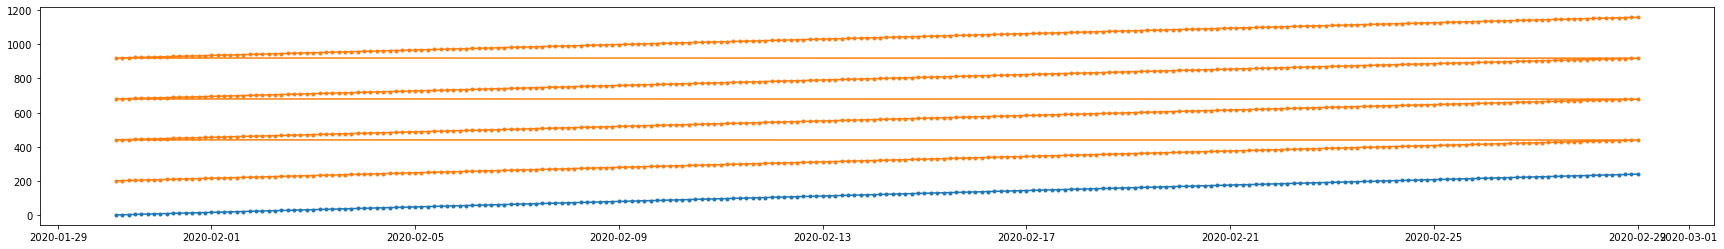

In [17]:
fig = plt.figure(figsize=(30,4))
plt.plot(sc_p.time, np.arange(len(sc_p.time)), ".-")
plt.plot(Tv_avg.time,200+np.arange(len(Tv_avg.time)), ".-")
plt.show()

In [ ]:
temp = (np.log((sc_p[:,1:]/sc_p[:,:-1])))/9.8
sc_dz = Tv_avg*temp

In [ ]:
sc_z = sc_dz[:,::-1,:].cumsum(axis=(1))[:,::-1,:]
print(sc_z.shape, Tv_avg.shape)

In [ ]:
sc_z = xr.Dataset({"z":xr.DataArray(sc_z, dims=Tv_avg.dims, 
                             attrs={"name":"z","units":"m"})}, 
           attrs={"long_name":"height from pressure","name":"height","units":"m"})
sc_z.to_netcdf("/work/bb1153/b380883/TWP/TWP_3D_SCREAM_z_20200130-20200228.nc")
print("done")

In [19]:
240*4


960

In [20]:
240//8

30

In [26]:
860//8//30

3

In [27]:
233*3

699